In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Car prices.csv", sep = "|")
data

,semel_yevuan,shem_yevuan,sug_degem,tozeret_cd,tozeret_nm,degem_cd,degem_nm,shnat_yitzur,mehir,kinuy_mishari
0,110,"צ'מפיון מוטורס בע""מ",M,724,פולקסווגן גרמנ,612,2EE1H5,2016,288000,CRAFTER
1,110,"צ'מפיון מוטורס בע""מ",M,724,פולקסווגן גרמנ,635,7HC-7EB137,2016,322000,TRANSPORTER
2,110,"צ'מפיון מוטורס בע""מ",M,724,פולקסווגן גרמנ,646,7HC-SGBTF7,2016,400500,CARAVELLE
3,110,"צ'מפיון מוטורס בע""מ",M,724,פולקסווגן גרמנ,649,7HC-SGJ1F7,2017,333800,TRANSPORTER
4,110,"צ'מפיון מוטורס בע""מ",M,724,פולקסווגן גרמנ,649,7HC-SGJ1F7,2016,347300,TRANSPORTER
...,...,...,...,...,...,...,...,...,...,...
33333,767,מיכאל ביטון,P,728,"פורד ארה""ב",249,P8U,2022,250000,MUSTANG
33334,134,קבוצת עמק איילון,P,728,"פורד ארה""ב",262,P8T,2019,339500,MUSTANG
33335,134,קבוצת עמק איילון,P,728,"פורד ארה""ב",262,P8T,2020,339500,MUSTANG
33336,134,קבוצת עמק איילון,P,728,"פורד ארה""ב",262,P8T,2022,310000,MUSTANG


In [3]:
data.describe(include = 'all')

,semel_yevuan,shem_yevuan,sug_degem,tozeret_cd,tozeret_nm,degem_cd,degem_nm,shnat_yitzur,mehir,kinuy_mishari
count,33338.000000,33338,33338,33338.000000,33338,33338.000000,33338,33338.000000,3.333800e+04,33338
unique,NaN,384,2,NaN,183,NaN,3671,NaN,NaN,1840
top,NaN,"צ'מפיון מוטורס בע""מ",P,NaN,מרצדס בנץ גרמנ,NaN,3E7E,NaN,NaN,MODEL 3
freq,NaN,4985,30623,NaN,4005,NaN,361,NaN,NaN,571
mean,224.629402,NaN,NaN,589.891235,NaN,457.740986,NaN,2019.049403,3.557862e+05,NaN
std,180.823624,NaN,NaN,295.290148,NaN,594.228398,NaN,1.962770,2.909767e+05,NaN
min,102.000000,NaN,NaN,11.000000,NaN,1.000000,NaN,2016.000000,4.000000e+04,NaN
25%,110.000000,NaN,NaN,404.000000,NaN,78.000000,NaN,2017.000000,1.689000e+05,NaN
50%,130.000000,NaN,NaN,624.000000,NaN,209.000000,NaN,2019.000000,2.769000e+05,NaN
75%,242.000000,NaN,NaN,787.000000,NaN,605.000000,NaN,2021.000000,4.290000e+05,NaN


In [4]:
pd.isnull(data).sum()

semel_yevuan     0
shem_yevuan      0
sug_degem        0
tozeret_cd       0
tozeret_nm       0
degem_cd         0
degem_nm         0
shnat_yitzur     0
mehir            0
kinuy_mishari    0
dtype: int64

In [5]:
data.corr()

,semel_yevuan,tozeret_cd,degem_cd,shnat_yitzur,mehir
semel_yevuan,1.000000,0.156793,0.343361,0.456815,0.158780
tozeret_cd,0.156793,1.000000,-0.126627,0.101962,0.030266
degem_cd,0.343361,-0.126627,1.000000,0.290201,0.174119
shnat_yitzur,0.456815,0.101962,0.290201,1.000000,0.110913
mehir,0.158780,0.030266,0.174119,0.110913,1.000000


In [6]:
#Unnecessary data was removed
data.drop(columns = ['semel_yevuan', 'tozeret_cd', 'degem_cd', 'kinuy_mishari'], axis = 1, inplace = True)

In [7]:
data

,shem_yevuan,sug_degem,tozeret_nm,degem_nm,shnat_yitzur,mehir
0,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...
33333,מיכאל ביטון,P,"פורד ארה""ב",P8U,2022,250000
33334,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500
33336,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2022,310000


In [8]:
#Make data_frame more readable
data.rename(columns = {"shem_yevuan" : "Importer_name",
                       'sug_degem' : 'Model_type',
                       'tozeret_nm' : 'Company_name',
                       'degem_nm' : 'Model_name',
                       'shnat_yitzur': 'Construction_year',
                       'mehir': 'Price'}, inplace = True)
data

,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
0,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...
33333,מיכאל ביטון,P,"פורד ארה""ב",P8U,2022,250000
33334,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500
33336,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2022,310000


In [9]:
data.describe(include = 'all')

,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
count,33338,33338,33338,33338,33338.000000,3.333800e+04
unique,384,2,183,3671,NaN,NaN
top,"צ'מפיון מוטורס בע""מ",P,מרצדס בנץ גרמנ,3E7E,NaN,NaN
freq,4985,30623,4005,361,NaN,NaN
mean,NaN,NaN,NaN,NaN,2019.049403,3.557862e+05
std,NaN,NaN,NaN,NaN,1.962770,2.909767e+05
min,NaN,NaN,NaN,NaN,2016.000000,4.000000e+04
25%,NaN,NaN,NaN,NaN,2017.000000,1.689000e+05
50%,NaN,NaN,NaN,NaN,2019.000000,2.769000e+05
75%,NaN,NaN,NaN,NaN,2021.000000,4.290000e+05


In [33]:
#Using label_encoder on all categorical data.
data.insert(loc=0, column='Model_name_encoded', value=LabelEncoder().fit_transform(data['Model_name']))
data.insert(loc=0, column='Company_name_encoded', value=LabelEncoder().fit_transform(data['Company_name']))
data.insert(loc=0, column='Model_type_encoded', value=LabelEncoder().fit_transform(data['Model_type']))
data.insert(loc=0, column='Importer_name_encoded', value=LabelEncoder().fit_transform(data['Importer_name']))

In [34]:
data

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
0,320,0,133,454,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,320,0,133,994,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,320,0,133,1003,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,320,0,133,1010,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,320,0,133,1010,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...,...,...,...,...
33333,253,1,140,3074,מיכאל ביטון,P,"פורד ארה""ב",P8U,2022,250000
33334,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500
33336,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2022,310000


In [35]:
data_encoded = data.copy()
data_encoded

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
0,320,0,133,454,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,320,0,133,994,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,320,0,133,1003,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,320,0,133,1010,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,320,0,133,1010,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...,...,...,...,...
33333,253,1,140,3074,מיכאל ביטון,P,"פורד ארה""ב",P8U,2022,250000
33334,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500
33336,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2022,310000


In [38]:
#Categorical columns before encoding were removed
data_encoded

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Construction_year,Price
0,320,0,133,454,2016,288000
1,320,0,133,994,2016,322000
2,320,0,133,1003,2016,400500
3,320,0,133,1010,2017,333800
4,320,0,133,1010,2016,347300
...,...,...,...,...,...,...
33333,253,1,140,3074,2022,250000
33334,330,1,140,3073,2019,339500
33335,330,1,140,3073,2020,339500
33336,330,1,140,3073,2022,310000


In [40]:
#No data is categorical now.
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33338 entries, 0 to 33337
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Importer_name_encoded  33338 non-null  int32
 1   Model_type_encoded     33338 non-null  int32
 2   Company_name_encoded   33338 non-null  int32
 3   Model_name_encoded     33338 non-null  int32
 4   Construction_year      33338 non-null  int64
 5   Price                  33338 non-null  int64
dtypes: int32(4), int64(2)
memory usage: 1.0 MB


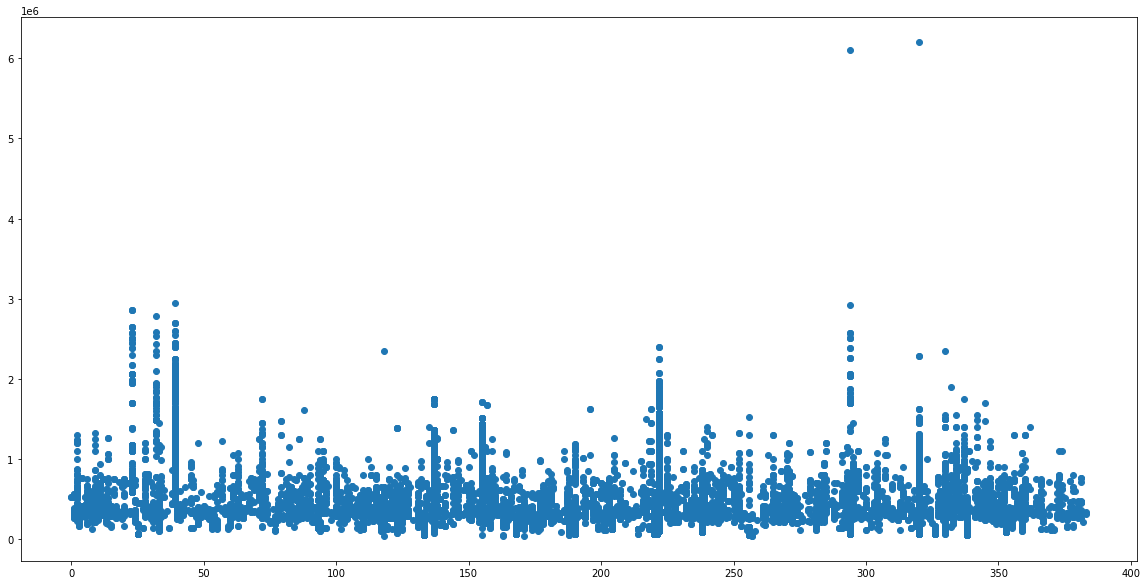

In [61]:
fig=plt.figure()
plt.scatter(data_encoded['Importer_name_encoded'], data_encoded['Price'])
plt.show()

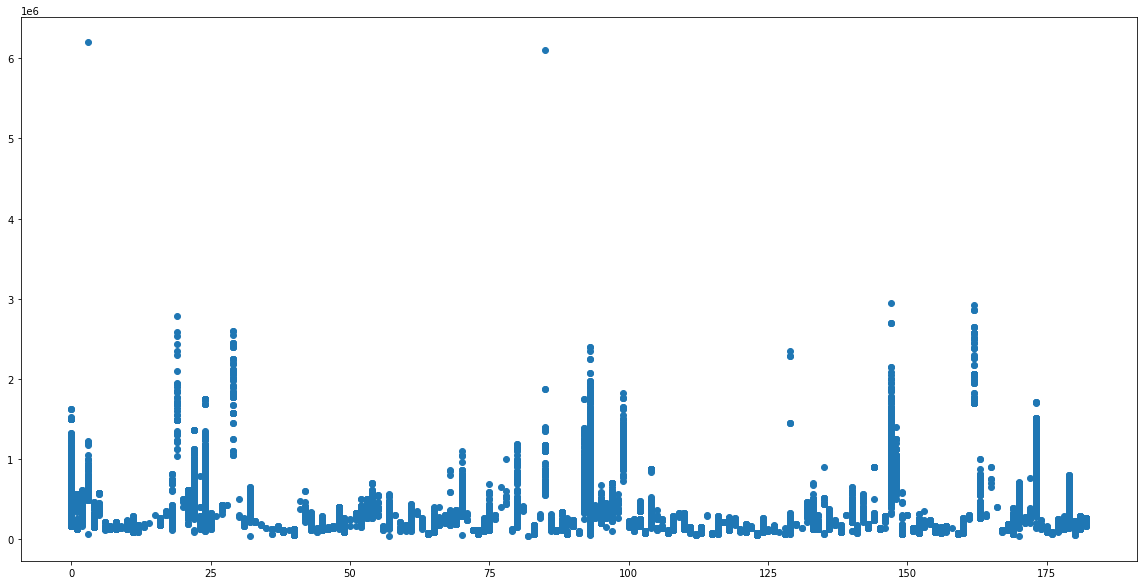

In [62]:
plt.scatter(data_encoded['Company_name_encoded'], data_encoded['Price'])
plt.show()

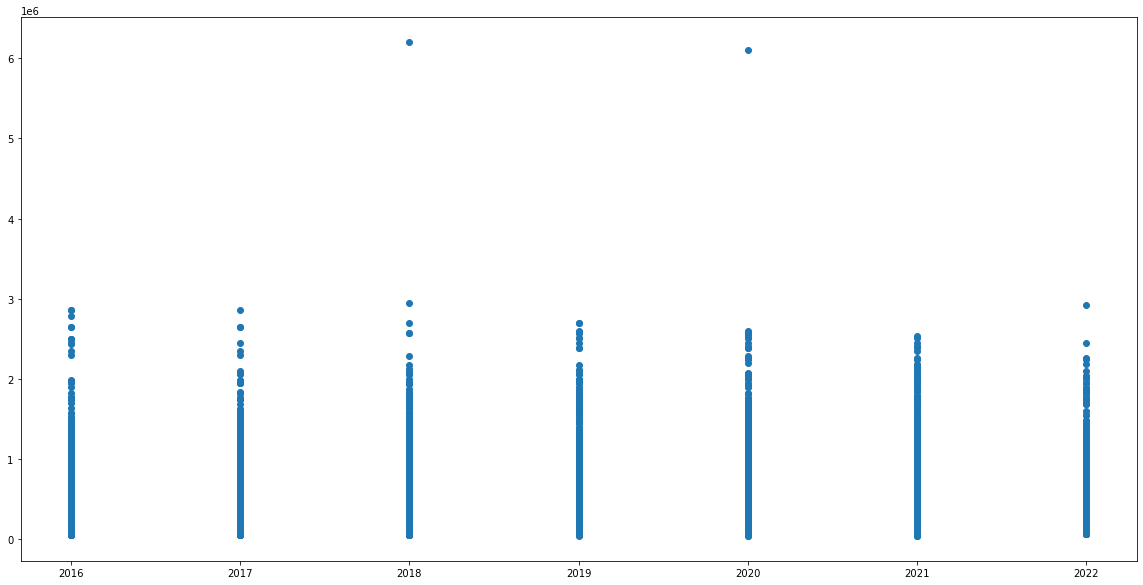

In [63]:
plt.scatter(data_encoded['Construction_year'], data_encoded['Price'])
plt.show()

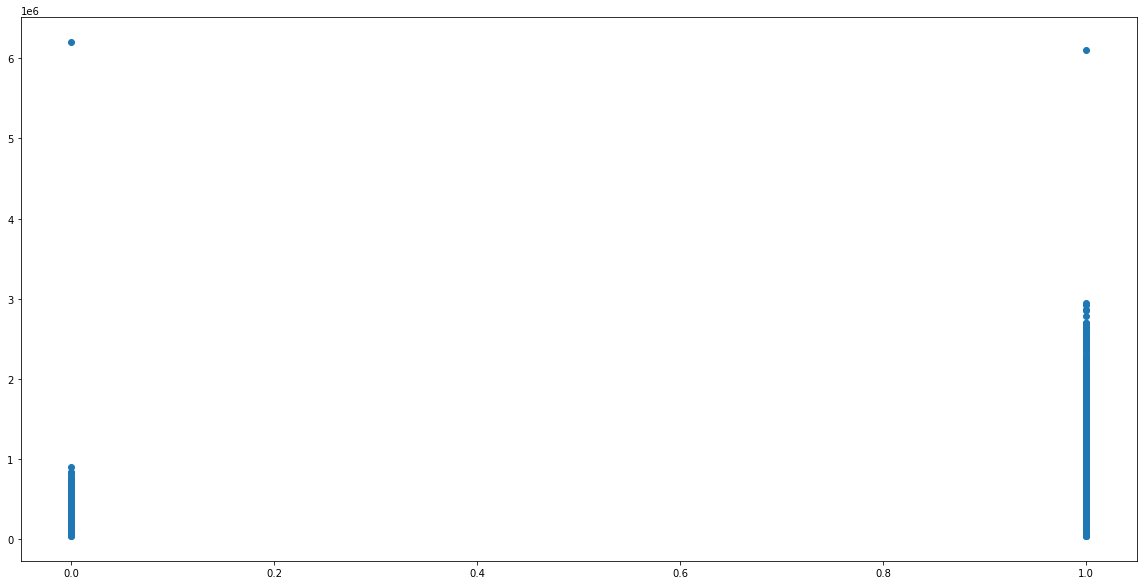

In [68]:
plt.scatter(data_encoded['Model_type_encoded'], data_encoded['Price'])
plt.show()

In [73]:
group_db_1 = data_encoded.groupby(['Company_name_encoded', 'Construction_year']).sum()
group_db_1

Importer_name_encoded  \
Company_name_encoded Construction_year                          
0                    2016                               57600   
                     2017                               83520   
                     2018                               38720   
                     2019                               31252   
                     2020                               28122   
...                                                       ...   
182                  2016                                6016   
                     2017                                2632   
                     2018                                2444   
                     2019                                 564   
                     2020                                 376   

                                        Model_type_encoded  \
Company_name_encoded Construction_year                       
0                    2016                              179   
                     2017                              261   
                     2018                              121   
                     2019                               98   
                     2020                               88   
...                                                    ...   
182                  2016                               32   
                     2017                               14   
                     2018                               13   
                     2019                                3   
                     2020                                2   

                                        Model_name_encoded      Price  
Company_name_encoded Construction_year                                 
0                    2016                           209952   73515600  
                     2017                           335335  111478255  
                     2018                           165886   47357627  
                     2019                           128199   38106300  
                     2020                           113475   34715500  
...                                                    ...        ...  
182                  2016                            31250    6784800  
                     2017                             8769    3172600  
                     2018                             4623    3038510  
                     2019                              147     749970  
                     2020                               98     489980  

[922 rows x 4 columns]

In [75]:
plt.scatter(group_db_1['Company_name_encoded'], group_db_1['Price'])
plt.show()

KeyError: 'Company_name_encoded'